# GAN_v2

원하는 숫자를 생성할 수 있게 한 버전

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 파라미터 설정

In [3]:
total_epoch = 100
batch_size = 100
n_hidden = 256
n_input = 28*28
n_noise = 128 
n_class = 10
learning_rate = 0.0002

# 모델 구성

In [4]:
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈와 실제 이미지에, 그에 해당하는 숫자에 대한 정보를 넣어주기 위해 사용함
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])


def generator(noise, labels):
    with tf.variable_scope('generator'):
        # noise 값에 labels 정보를 추가함 
        inputs = tf.concat([noise, labels], 1)
        
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input, activation=tf.nn.sigmoid)
    
    return output

def discriminator(inputs, labels, reuse=None): 
    with tf.variable_scope('discriminator') as scope:
        # 노이즈에서 생성한 이미지와 실제 이미지를 판별하는 모델의 변수를 동일하게 하기 위해 
        # 이전에 사용되었던 변수를 재사용함 
        if reuse:
            scope.reuse_variables()
        
        inputs = tf.concat([inputs, labels], 1)
        hidden = tf.layers.dense(inputs, n_hidden, activation=tf.nn.relu)
        output = tf.layers.dense(hidden, 1, activation=None)
    
    return output

def get_noise(batch_size, n_noise):
    return np.random.uniform(-1.0, 1.0, size=[batch_size, n_noise])

# 노이즈를 이용해 랜덤한 이미지 생성함
G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

In [5]:
loss_D_real = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels=tf.zeros_like(D_gene)))

loss_D = loss_D_real + loss_D_gene

loss_G = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=D_gene, labels=tf.ones_like(D_gene)))

var_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='discriminator')
var_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='generator')

train_D = tf.train.AdamOptimizer(learning_rate).minimize(loss_D, var_list=var_D)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(loss_G, var_list=var_G)

# 신경망 모델 학습

Epoch : 0001 D loss:  0.0795 G loss:  3.6440


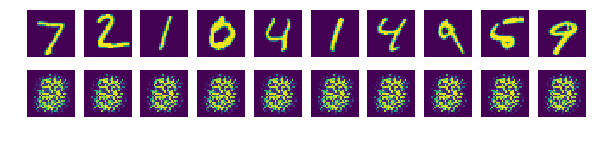

Epoch : 0002 D loss:  0.0414 G loss:  4.2606
Epoch : 0003 D loss:  0.0783 G loss:  4.1461
Epoch : 0004 D loss:  0.0372 G loss:  5.4678
Epoch : 0005 D loss:  0.0115 G loss:  6.5588
Epoch : 0006 D loss:  0.0160 G loss:  5.3495
Epoch : 0007 D loss:  0.0344 G loss:  4.0523
Epoch : 0008 D loss:  0.0241 G loss:  5.1999
Epoch : 0009 D loss:  0.0732 G loss:  5.5460
Epoch : 0010 D loss:  0.1259 G loss:  5.0337


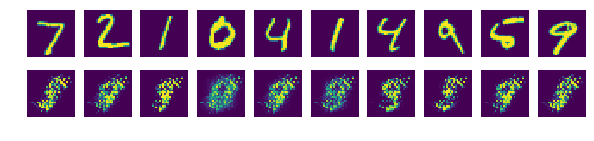

Epoch : 0011 D loss:  0.0441 G loss:  4.9330
Epoch : 0012 D loss:  0.0593 G loss:  4.5163
Epoch : 0013 D loss:  0.0911 G loss:  4.5795
Epoch : 0014 D loss:  0.0688 G loss:  4.2464
Epoch : 0015 D loss:  0.0670 G loss:  4.7848
Epoch : 0016 D loss:  0.0957 G loss:  5.1232
Epoch : 0017 D loss:  0.0397 G loss:  5.5946
Epoch : 0018 D loss:  0.1149 G loss:  5.9959
Epoch : 0019 D loss:  0.0553 G loss:  6.0175
Epoch : 0020 D loss:  0.0489 G loss:  6.2339


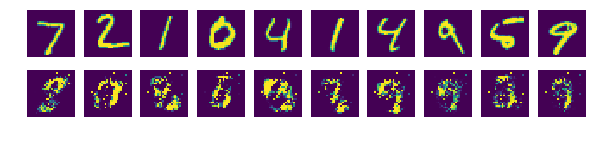

Epoch : 0021 D loss:  0.0939 G loss:  6.2376
Epoch : 0022 D loss:  0.1025 G loss:  4.7252
Epoch : 0023 D loss:  0.0345 G loss:  5.7528
Epoch : 0024 D loss:  0.0723 G loss:  5.5139
Epoch : 0025 D loss:  0.0996 G loss:  5.2897
Epoch : 0026 D loss:  0.1447 G loss:  5.9148
Epoch : 0027 D loss:  0.0239 G loss:  7.0200
Epoch : 0028 D loss:  0.0822 G loss:  6.1080
Epoch : 0029 D loss:  0.0375 G loss:  5.8886
Epoch : 0030 D loss:  0.0650 G loss:  6.8528


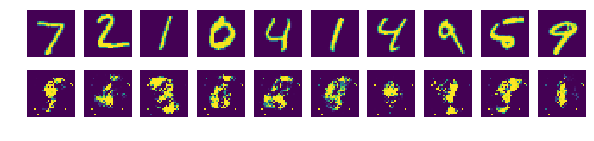

Epoch : 0031 D loss:  0.1040 G loss:  5.5775
Epoch : 0032 D loss:  0.0177 G loss:  7.8354
Epoch : 0033 D loss:  0.0492 G loss:  6.4801
Epoch : 0034 D loss:  0.0458 G loss:  5.9474
Epoch : 0035 D loss:  0.1117 G loss:  5.7606
Epoch : 0036 D loss:  0.1990 G loss:  5.6004
Epoch : 0037 D loss:  0.0561 G loss:  5.9123
Epoch : 0038 D loss:  0.2142 G loss:  5.3611
Epoch : 0039 D loss:  0.0893 G loss:  6.4170
Epoch : 0040 D loss:  0.0356 G loss:  7.4398


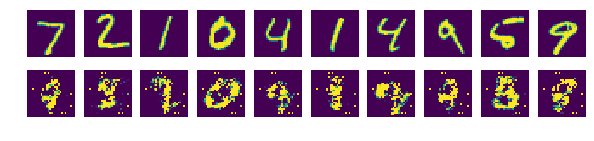

Epoch : 0041 D loss:  0.1227 G loss:  5.8246
Epoch : 0042 D loss:  0.1433 G loss:  5.3820
Epoch : 0043 D loss:  0.7084 G loss:  3.8733
Epoch : 0044 D loss:  0.0561 G loss:  6.0689
Epoch : 0045 D loss:  0.0892 G loss:  5.6714
Epoch : 0046 D loss:  0.1220 G loss:  4.9570
Epoch : 0047 D loss:  0.3908 G loss:  4.1898
Epoch : 0048 D loss:  0.1522 G loss:  4.7710
Epoch : 0049 D loss:  0.3967 G loss:  3.7061
Epoch : 0050 D loss:  0.1355 G loss:  5.1692


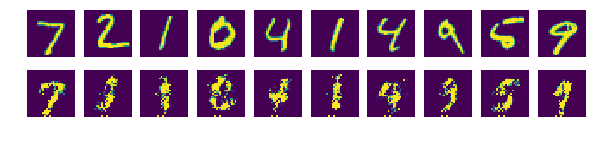

Epoch : 0051 D loss:  0.0469 G loss:  4.9585
Epoch : 0052 D loss:  0.7622 G loss:  4.0129
Epoch : 0053 D loss:  0.0368 G loss:  6.6166
Epoch : 0054 D loss:  0.4544 G loss:  3.2018
Epoch : 0055 D loss:  0.3877 G loss:  3.7546
Epoch : 0056 D loss:  0.2306 G loss:  5.0810
Epoch : 0057 D loss:  0.1180 G loss:  4.5826
Epoch : 0058 D loss:  0.3008 G loss:  3.2779
Epoch : 0059 D loss:  0.7542 G loss:  3.1691
Epoch : 0060 D loss:  0.1700 G loss:  4.3175


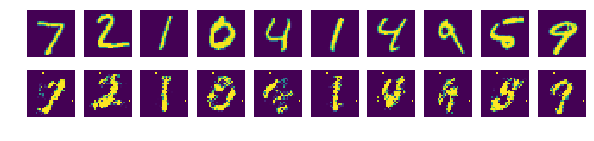

Epoch : 0061 D loss:  0.3606 G loss:  3.3107
Epoch : 0062 D loss:  0.3278 G loss:  3.3094
Epoch : 0063 D loss:  0.2935 G loss:  3.4923
Epoch : 0064 D loss:  0.7945 G loss:  2.5882
Epoch : 0065 D loss:  0.1012 G loss:  4.9679
Epoch : 0066 D loss:  0.3882 G loss:  3.5316
Epoch : 0067 D loss:  0.1225 G loss:  5.2280
Epoch : 0068 D loss:  0.2013 G loss:  4.2731
Epoch : 0069 D loss:  0.4107 G loss:  3.7621
Epoch : 0070 D loss:  0.3823 G loss:  3.4846


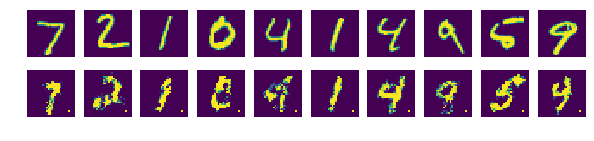

Epoch : 0071 D loss:  0.7367 G loss:  2.8992
Epoch : 0072 D loss:  0.2107 G loss:  3.9973
Epoch : 0073 D loss:  0.4042 G loss:  3.3667
Epoch : 0074 D loss:  0.2166 G loss:  3.9809
Epoch : 0075 D loss:  0.1418 G loss:  3.8298
Epoch : 0076 D loss:  0.2867 G loss:  3.7375
Epoch : 0077 D loss:  0.3859 G loss:  3.2209
Epoch : 0078 D loss:  0.1516 G loss:  3.9353
Epoch : 0079 D loss:  0.4069 G loss:  2.7557
Epoch : 0080 D loss:  0.8475 G loss:  2.3800


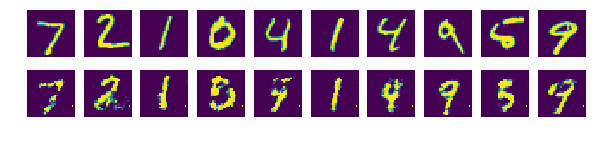

Epoch : 0081 D loss:  0.2870 G loss:  4.2069
Epoch : 0082 D loss:  0.1100 G loss:  4.0888
Epoch : 0083 D loss:  0.2839 G loss:  3.4203
Epoch : 0084 D loss:  0.2595 G loss:  3.8342
Epoch : 0085 D loss:  0.4723 G loss:  2.5986
Epoch : 0086 D loss:  0.4427 G loss:  2.9336
Epoch : 0087 D loss:  0.1289 G loss:  3.9052
Epoch : 0088 D loss:  0.4400 G loss:  2.8727
Epoch : 0089 D loss:  0.3491 G loss:  3.4822
Epoch : 0090 D loss:  0.5094 G loss:  2.9107


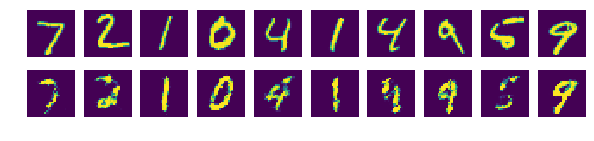

Epoch : 0091 D loss:  0.3868 G loss:  2.9381
Epoch : 0092 D loss:  0.3629 G loss:  3.1568
Epoch : 0093 D loss:  0.4232 G loss:  2.8685
Epoch : 0094 D loss:  0.5067 G loss:  2.5410
Epoch : 0095 D loss:  0.5373 G loss:  2.7638
Epoch : 0096 D loss:  0.3410 G loss:  3.0402
Epoch : 0097 D loss:  0.3308 G loss:  3.4238
Epoch : 0098 D loss:  0.5974 G loss:  2.7110
Epoch : 0099 D loss:  0.3591 G loss:  3.0280
Epoch : 0100 D loss:  0.4813 G loss:  2.4819


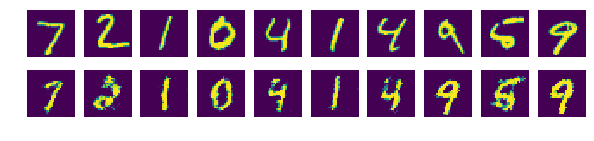

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples / batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Y: batch_ys, Z: noise})
    
    print('Epoch :', '%04d' % (epoch + 1), 
      'D loss: ', '{:.4f}'.format(loss_val_D),
      'G loss: ', '{:.4f}'.format(loss_val_G),
     )

    # 학습 과정 관찰
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Y: mnist.test.labels[:sample_size], Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()
            
            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        plt.show()